/var/folders/yc/q2nd_35d3gl6j1_9vdlr7th80000gn/T/ipykernel_27227/3527466220.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='habit', y='weight', data=df_clean, palette='Set2', showmeans=True)


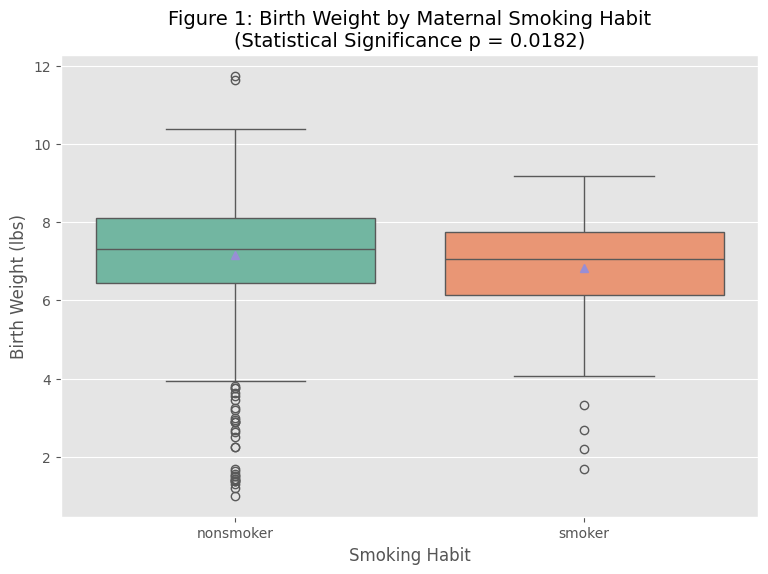

---Figure 1---


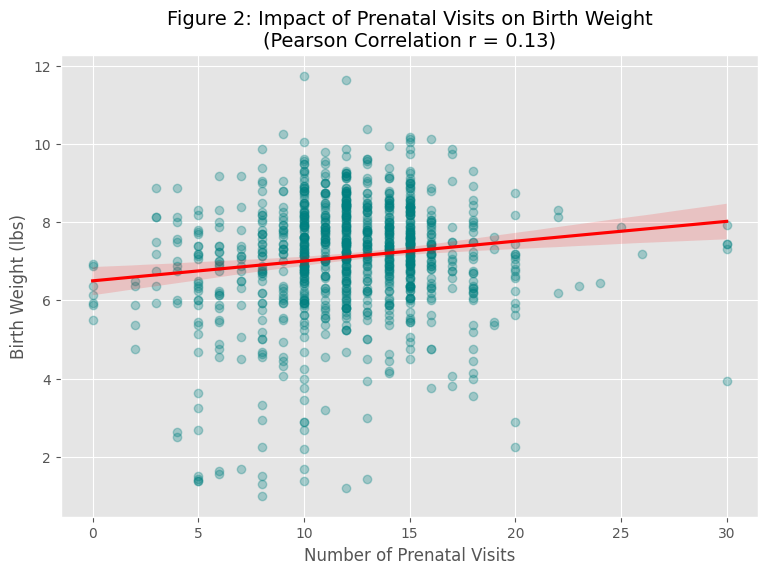

---Figure 2---


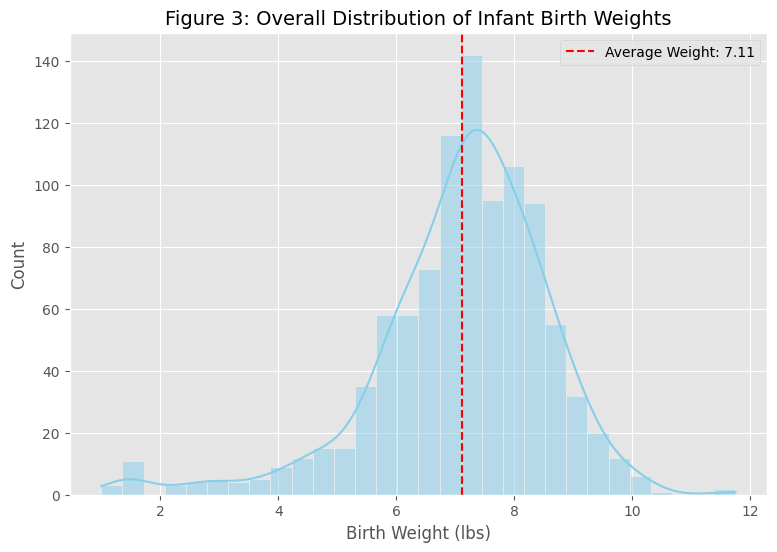

---Figure 3---


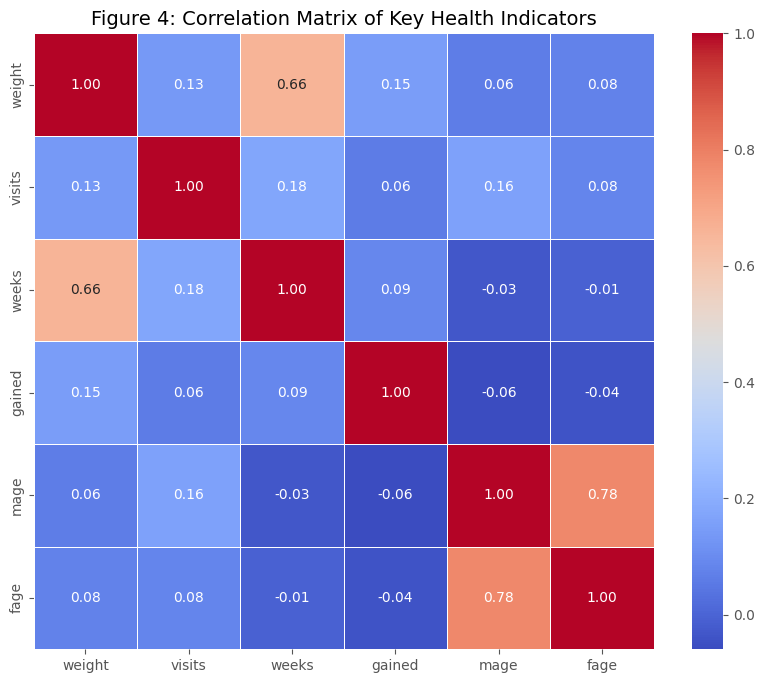

---Figure 4---
--- Key Finding ---
--- Executive Summary of Statistical Findings ---
1. Maternal Smoking: Infants born to smokers weighed an average of 0.32 lbs less than those of non-smokers. The difference is statistically significant (p = 0.0182).
2. Healthcare Intervention: A positive correlation (r = 0.13) was identified between prenatal visits and birth weight, suggesting that increased medical oversight contributes to better fetal development.
3. Dataset Integrity: Analysis conducted on 991 validated records after data cleaning.


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.stats.weightstats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# --- Prepare for Data ---
nc = pd.read_csv('nc.csv')
# Organize and Clean the Data 
df_clean = nc.dropna(subset=['habit', 'visits', 'weight'])

# --- The relationship between Smoke Habit and Newborns' Weight(Independent T-test/Z-test) ---
smoker_w = df_clean[df_clean['habit'] == 'smoker']['weight']
nonsmoker_w = df_clean[df_clean['habit'] == 'nonsmoker']['weight']


cm_habit = st.CompareMeans(st.DescrStatsW(smoker_w), st.DescrStatsW(nonsmoker_w))
z_h, p_h = cm_habit.ztest_ind(usevar='unequal')

# Boxplot
plt.figure(figsize=(9, 6))
sns.boxplot(x='habit', y='weight', data=df_clean, palette='Set2', showmeans=True)
plt.title(f'Figure 1: Birth Weight by Maternal Smoking Habit\n(Statistical Significance p = {p_h:.4f})', fontsize=14)
plt.xlabel('Smoking Habit', fontsize=12)
plt.ylabel('Birth Weight (lbs)', fontsize=12)
plt.show() 
print(f"---Figure 1---")

# --- The Relationship betwwen Number of Visit and Newborns' weight (Linear Relationship) ---
corr_v, _ = stats.pearsonr(df_clean['visits'], df_clean['weight'])

# Regression plot
plt.figure(figsize=(9, 6))
sns.regplot(x='visits', y='weight', data=df_clean, 
            scatter_kws={'alpha':0.3, 'color':'teal'}, line_kws={'color':'red'})
plt.title(f'Figure 2: Impact of Prenatal Visits on Birth Weight\n(Pearson Correlation r = {corr_v:.2f})', fontsize=14)
plt.xlabel('Number of Prenatal Visits', fontsize=12)
plt.ylabel('Birth Weight (lbs)', fontsize=12)
plt.show()
print(f"---Figure 2---")

# --- (Data Distribution) ---
# Histogram with density curve
plt.figure(figsize=(9, 6))
sns.histplot(df_clean['weight'], kde=True, color='skyblue', bins=30)
plt.axvline(df_clean['weight'].mean(), color='red', linestyle='--', label=f'Average Weight: {df_clean["weight"].mean():.2f}')
plt.title('Figure 3: Overall Distribution of Infant Birth Weights', fontsize=14)
plt.xlabel('Birth Weight (lbs)', fontsize=12)
plt.legend()
plt.show()
print(f"---Figure 3---")

# --- (Exploratory Heatmap) ---
# Correlation heatmap
plt.figure(figsize=(10, 8))
cols = ['weight', 'visits', 'weeks', 'gained', 'mage', 'fage']
sns.heatmap(df_clean[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Figure 4: Correlation Matrix of Key Health Indicators', fontsize=14)
plt.show()
print(f"---Figure 4---")

# Final Conclusion
print(f"--- Key Finding ---")
print("--- Executive Summary of Statistical Findings ---")
# Summary 1: Smoking Impact
weight_diff = abs(np.mean(smoker_w) - np.mean(nonsmoker_w))
print(f"1. Maternal Smoking: Infants born to smokers weighed an average of {weight_diff:.2f} lbs less than those of non-smokers. "
      f"The difference is statistically significant (p = {p_h:.4f}).")
# Summary 2: Healthcare Correlation
print(f"2. Healthcare Intervention: A positive correlation (r = {corr_v:.2f}) was identified between prenatal visits and birth weight, "
      f"suggesting that increased medical oversight contributes to better fetal development.")
# Summary 3: Sample Size
print(f"3. Dataset Integrity: Analysis conducted on {len(df_clean)} validated records after data cleaning.")

Interpretation of Results：


The analysis reveals a statistically significant relationship between maternal behaviors and infant birth outcomes. Infants born to smokers exhibit lower average birth weights compared to those born to non-smokers, suggesting that maternal smoking is an important risk factor for low birth weight.
In addition, regression and correlation analysis indicate that prenatal visit frequency is positively associated with infant birth weight, highlighting the role of preventive healthcare in supporting healthy fetal development.
While these findings provide valuable insights, the analysis focuses on associations rather than causal effects. Future work could incorporate multivariate regression models to control for additional confounding variables and further strengthen policy-relevant conclusions.